In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
N = 10_000_000
np.random.seed(0)

In [13]:
data = np.random.rand(N)

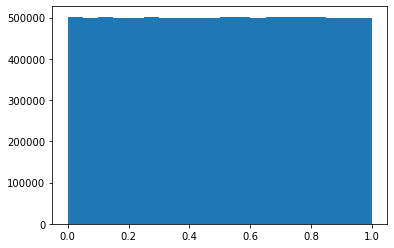

In [14]:
plt.hist(data, bins=20)
plt.show()

In [15]:
data = np.random.randn(N)

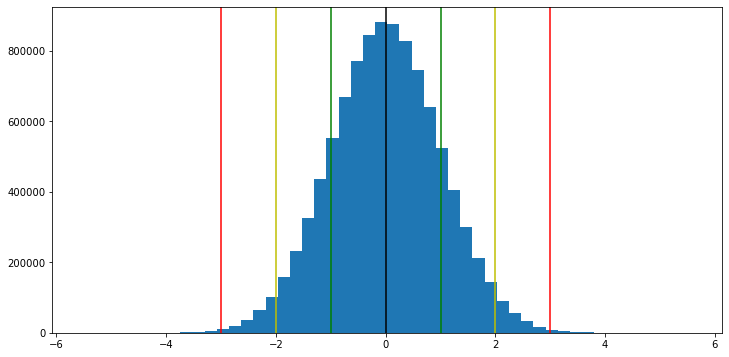

In [26]:
plt.figure(figsize=(12,6))
plt.hist(data, bins=50)
plt.axvline( np.median(data) , color="black" )
plt.axvline( np.median(data)+np.std(data), color="green" ); plt.axvline( np.median(data)-np.std(data), color="green" )
plt.axvline( np.median(data)+2*np.std(data), color="y" ); plt.axvline( np.median(data)-2*np.std(data), color="y" )
plt.axvline( np.median(data)+3*np.std(data), color="r" ); plt.axvline( np.median(data)-3*np.std(data), color="r" )
plt.show()

In [20]:
arr = np.array([1,1,1,2,3,5,10,100,100])
arr.mean() , np.median(arr)

(24.77777777777778, 3.0)

In [27]:
np.median(data), np.mean(data)

(-1.384585426180428e-05, 0.0002311604438000438)

In [28]:
_mean = np.mean(data)
_std = np.std(data)

In [30]:
len( data[ (data>=_mean-_std) & (data<=_mean+_std)  ] ) / N * 100

68.27826999999999

In [31]:
len( data[ (data>=_mean-2*_std) & (data<=_mean+2*_std)  ] ) / N * 100

95.43964

In [32]:
len( data[ (data>=_mean-3*_std) & (data<=_mean+3*_std)  ] ) / N * 100

99.73062999999999

In [33]:
# test rozkładu z wykorzystaniem testu shapiro-wilka
from scipy.stats import shapiro

In [34]:
shapiro(data)

C:\Users\kurs\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=1.0018516778945923, pvalue=1.0)

In [36]:
arr = np.random.randn(4000)
shapiro(arr)

ShapiroResult(statistic=0.9995458722114563, pvalue=0.4917376637458801)

In [38]:
df = pd.DataFrame(data)
df.describe()

,0
count,1.000000e+07
mean,2.311604e-04
std,9.997477e-01
min,-5.519059e+00
25%,-6.740103e-01
50%,-1.384585e-05
75%,6.741794e-01
max,5.575792e+00


In [43]:
df = pd.read_csv("http://51.91.120.89/extras/otodom.csv")
df

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
0,46lCR,979000,5,4,5,83.00,2009
1,44Utr,1400000,7,3,2,82.94,2011
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
...,...,...,...,...,...,...,...
4309,33tFV,2500000,2,6,2,210.00,2015
4310,2UNVb,1860000,8,3,7,98.00,2012
4311,2JILp,995000,13,5,8,138.00,1997
4312,2zmYc,2550000,3,3,1,118.50,2009


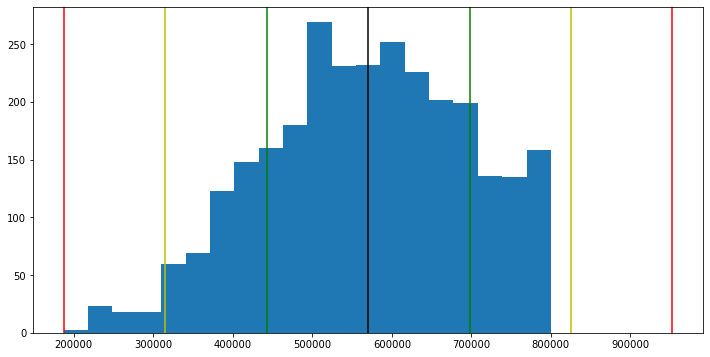

In [48]:
data = df[df.cena < 800_000].cena
plt.figure(figsize=(12,6))
plt.hist(data, bins=20)
plt.axvline( np.median(data) , color="black" )
plt.axvline( np.median(data)+np.std(data), color="green" ); plt.axvline( np.median(data)-np.std(data), color="green" )
plt.axvline( np.median(data)+2*np.std(data), color="y" ); plt.axvline( np.median(data)-2*np.std(data), color="y" )
plt.axvline( np.median(data)+3*np.std(data), color="r" ); plt.axvline( np.median(data)-3*np.std(data), color="r" )
plt.show()

In [46]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


### Korelacja

In [49]:
np.random.seed(0)
x = np.random.randint(-10, 11, 5000)
y = 2*x + np.random.randn(5000)*10

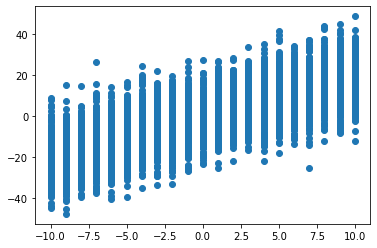

In [50]:
plt.scatter(x, y)

In [51]:
from scipy.stats import pearsonr, spearmanr

In [52]:
pearsonr(x, y)

(0.7635868855086893, 0.0)

In [53]:
spearmanr(x, y)

SpearmanrResult(correlation=0.7720387637016054, pvalue=0.0)

In [54]:
df = pd.DataFrame({ "x":x, "y":y })
df

,x,y
0,2,8.029931
1,5,29.111195
2,-10,-25.759701
3,-7,-21.759662
4,-7,-13.749474
...,...,...
4995,-6,-12.988602
4996,1,5.995345
4997,5,-4.511550
4998,-1,-4.596051


In [55]:
df.corr()

,x,y
x,1.000000,0.763587
y,0.763587,1.000000


In [56]:
df = pd.read_csv("http://51.91.120.89/extras/otodom.csv")
df

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
0,46lCR,979000,5,4,5,83.00,2009
1,44Utr,1400000,7,3,2,82.94,2011
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
...,...,...,...,...,...,...,...
4309,33tFV,2500000,2,6,2,210.00,2015
4310,2UNVb,1860000,8,3,7,98.00,2012
4311,2JILp,995000,13,5,8,138.00,1997
4312,2zmYc,2550000,3,3,1,118.50,2009


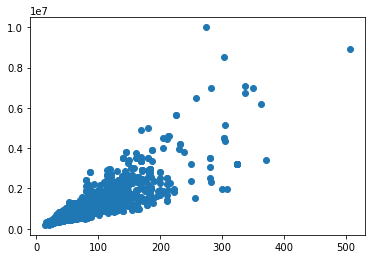

In [57]:
plt.scatter(df.powierzchnia, df.cena)

In [59]:
df[ ["powierzchnia","cena"] ].corr()

,powierzchnia,cena
powierzchnia,1.000000,0.854614
cena,0.854614,1.000000


In [60]:
df.corr()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
cena,1.000000,-0.188122,0.608984,-0.026369,0.854614,-0.001137
liczba_pieter,-0.188122,1.000000,-0.220447,0.497311,-0.232934,0.008719
liczba_pokoi,0.608984,-0.220447,1.000000,-0.053239,0.793551,-0.001417
pietro,-0.026369,0.497311,-0.053239,1.000000,-0.059320,0.019680
powierzchnia,0.854614,-0.232934,0.793551,-0.059320,1.000000,-0.003730
rok_budowy,-0.001137,0.008719,-0.001417,0.019680,-0.003730,1.000000


In [61]:
import seaborn as sns

<AxesSubplot:>

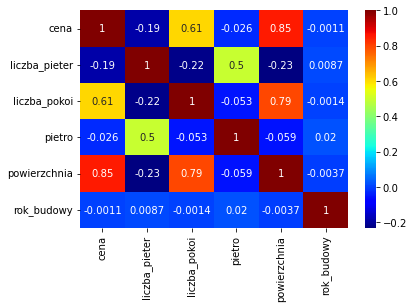

In [62]:
sns.heatmap( df.corr(), annot=True, cmap="jet" )